In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

In [4]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


1. For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Owner-occupied homes')

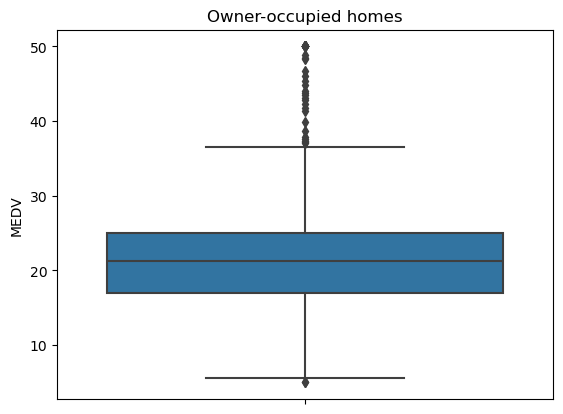

In [6]:
ax = sns.boxplot(y = 'MEDV', data = boston_df)
ax.set_title('Owner-occupied homes')

2. Provide a  bar plot for the Charles river variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

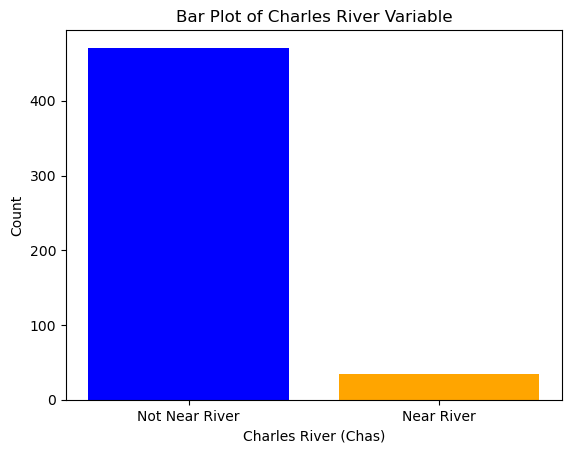

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [12]:

chas_counts = boston_df['CHAS'].value_counts()

plt.bar(chas_counts.index, chas_counts.values, color=['blue', 'orange'])

plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (Chas)')
plt.ylabel('Count')
plt.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])
plt.show()
chas_counts.index

The barplot of the Charles River suggests that a significant proportion of the dataset corresponds to areas located away from the Charles River.

3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

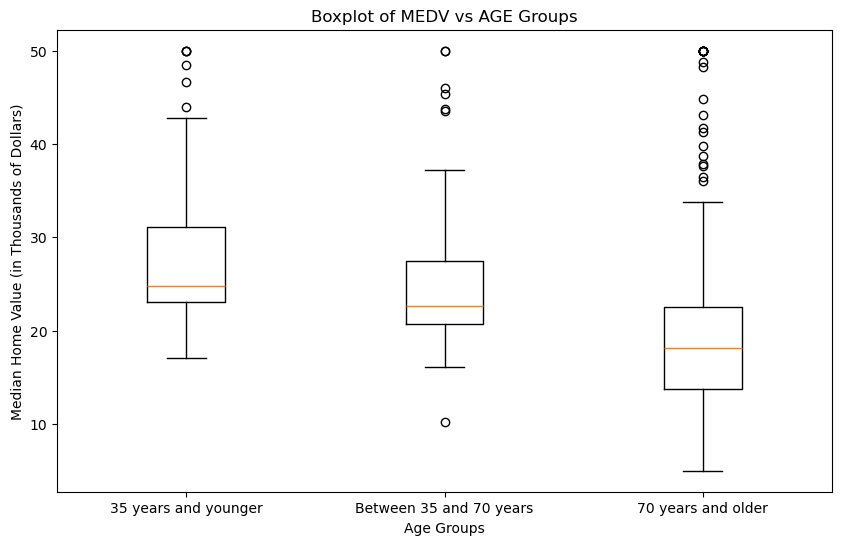

In [13]:
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
plt.boxplot([boston_df[boston_df['AGE_Group'] == label]['MEDV'] for label in labels], labels=labels)

plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

4.Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

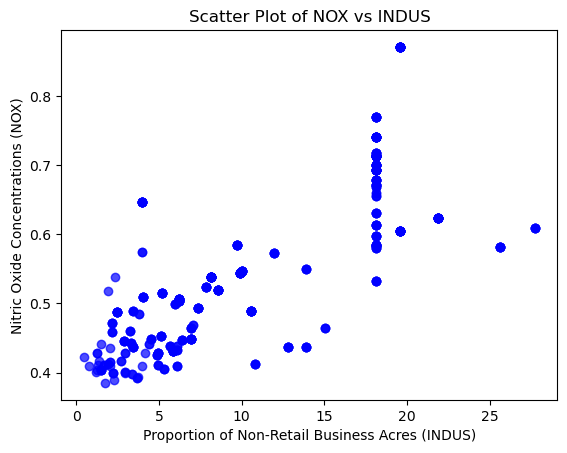

In [15]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.7)

plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

plt.show()

Values in the bottom-left section of the scatter plot indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.
Generally, a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

5. Create a histogram for the pupil to teacher ratio variable

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

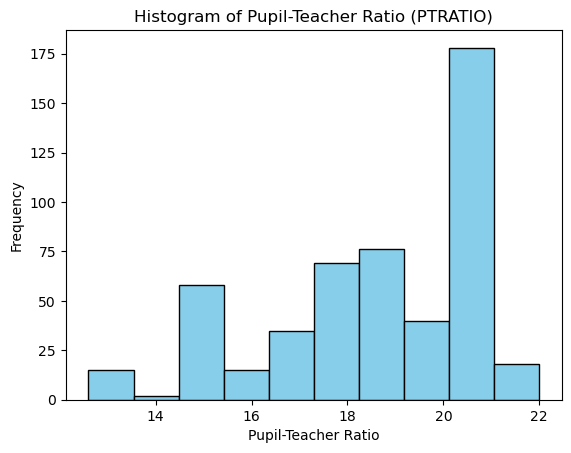

In [18]:
plt.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')

plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

plt.show()

In [19]:
frequencies = boston_df['PTRATIO'].value_counts().reset_index().rename(columns={'count': 'Count'})


total_values = sum(frequencies['Count'])
frequencies['Percentage'] = (frequencies['Count'] / total_values) * 100

frequencies

,PTRATIO,Count,Percentage
0,20.2,140,27.667984
1,14.7,34,6.719368
2,21.0,27,5.335968
3,17.8,23,4.545455
4,19.2,19,3.754941
5,17.4,18,3.557312
6,18.6,17,3.359684
7,19.1,17,3.359684
8,18.4,16,3.162055
9,16.6,16,3.162055


The mode appears to be around 20.2, being the value with the highest frequency (140 observations). This suggests that a pupil-teacher ratio of 20.2 is prevalent in the dataset. Several values have low frequencies, indicating that the 'PTRATIO' variable is not uniformly distributed, and certain values are more common than others.

Task 3: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

To test whether there is a significant difference in the median value of houses bounded by the Charles River or not, we can use a t-test for independent samples.

Hypothesis:

Null Hypothesis -> There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis -> There's a significant difference in median value between houses bounded and not bounded by the Charles River

In [22]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group,AGE_Group,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years,Between 35 and 70 years,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older,70 years and older,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years,Between 35 and 70 years,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years,Between 35 and 70 years,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years,Between 35 and 70 years,FAR


In [23]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], 
                      boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Given the p-value is less than 0.05, we reject the Null Hypothesis, i.e.,there is not a statistical difference in median value betwenn houses near the Charles River and houses far away

Task 4: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis

Null Hypotesis: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [25]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Given p-value is less than 0.05, we fail to accept the Null Hypothesis here is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Task 5 : Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [28]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.763651446920915, pvalue=7.913361061241167e-98)

Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS.

Task 6: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:
 Ho : Dis is not correlated with MEDV
 Ha : Dis is correlated with MEDV

In [31]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        00:29:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between DIS and MEDV.